In [3]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load the dataset
file_path = 'perovskite_database_query.csv'
data = pd.read_csv(file_path)

# Filter rows where 'Cell_architecture' is exactly 'nip' (if needed)
data = data[data['Cell_architecture'].str.strip().str.lower() == 'nip']

# Extract the 'Cell_stack_sequence' column
cell_stack_sequences = data['Cell_stack_sequence'].dropna().reset_index(drop=True)

# Function to preprocess and tokenize sequences
def tokenize_sequences(sequence_series):
    sequences = []
    for seq in sequence_series:
        # Split the sequence into layers
        layers = seq.split(' | ')
        tokenized_layers = []
        for layer in layers:
            # Split layers into materials
            materials = layer.split('; ')
            tokenized_layers.extend(materials)
        sequences.append(tokenized_layers)
    return sequences

# Tokenize the cell stack sequences
tokenized_sequences = tokenize_sequences(cell_stack_sequences)

# Train the Word2Vec model
model = Word2Vec(
    sentences=tokenized_sequences,
    vector_size=50,  # Embedding size
    window=5,        # Context window size
    min_count=1,     # Minimum frequency count of words
    workers=4,       # Number of worker threads
    sg=1             # Skip-gram model
)

# Get the list of unique materials (vocabulary)
materials = list(model.wv.index_to_key)
print("Number of unique materials:", len(materials))


# Train the Word2Vec model
model = Word2Vec(
    sentences=tokenized_sequences,
    vector_size=50,  # Embedding size
    window=5,        # Context window size
    min_count=1,     # Minimum frequency count of words
    workers=4,       # Number of worker threads
    sg=1             # Skip-gram model
)

# Get the list of unique materials (vocabulary)
materials = list(model.wv.index_to_key)
print("Number of unique materials:", len(materials))



/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_77714/796277147.py:11: DtypeWarning: Columns (10,22,29,31,32,35,36,40,44,45,46,48,51,54,65,84,89,90,93,98,99,100,105,108,115,118,122,123,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,194,225,271,272,273,277,304,315,321,325,330,331,335,336,342,348,369,371,373,374,376,380,384,387,403,405,407,409) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Number of unique materials: 1931
Number of unique materials: 1931


/Users/herbrowan/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


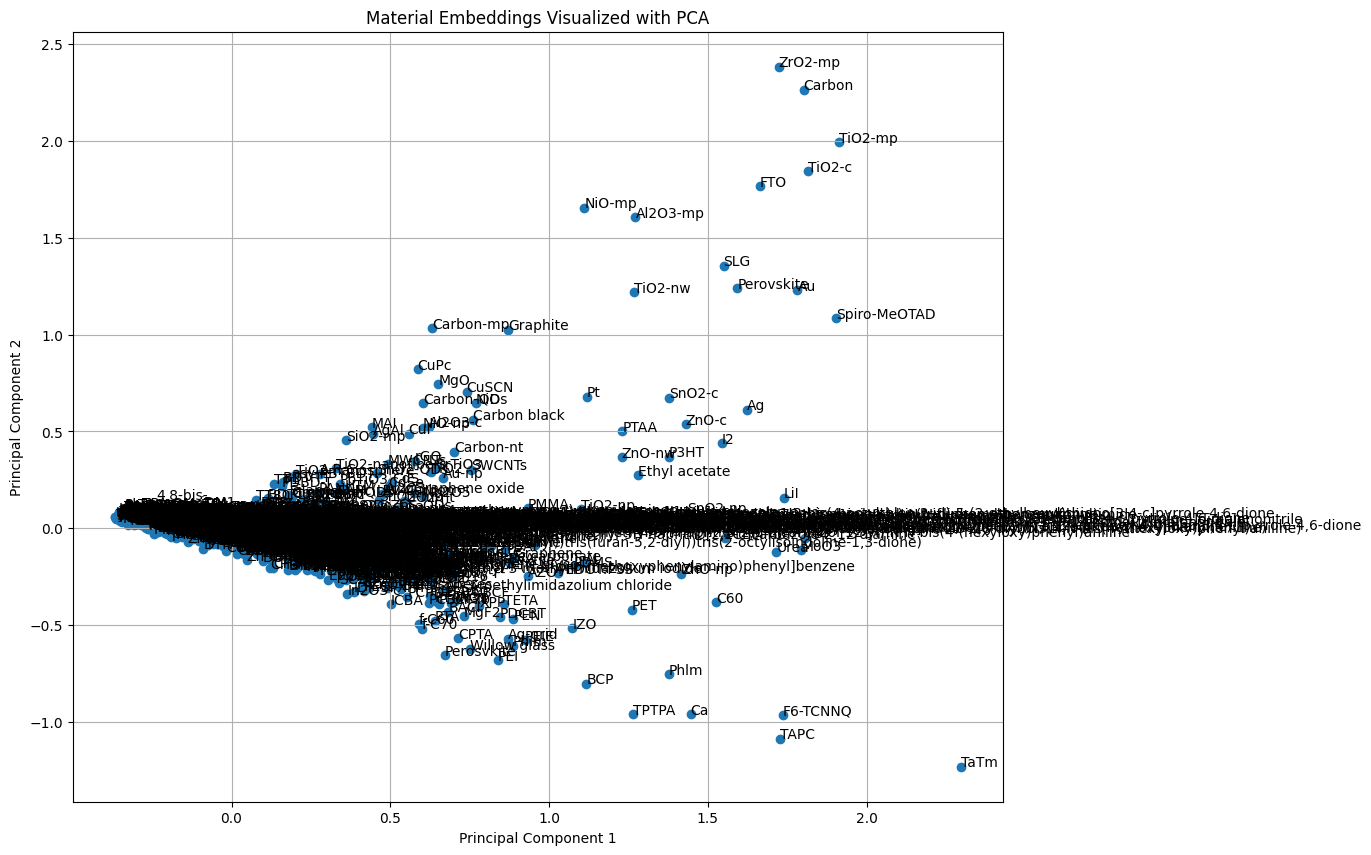

In [4]:
# Extract embeddings
embeddings = np.array([model.wv[material] for material in materials])

# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_embeddings_pca = pca.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(12, 10))
plt.scatter(reduced_embeddings_pca[:, 0], reduced_embeddings_pca[:, 1])

# Annotate materials
for i, material in enumerate(materials):
    plt.annotate(material, xy=(reduced_embeddings_pca[i, 0], reduced_embeddings_pca[i, 1]))

plt.title('Material Embeddings Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


/Users/herbrowan/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


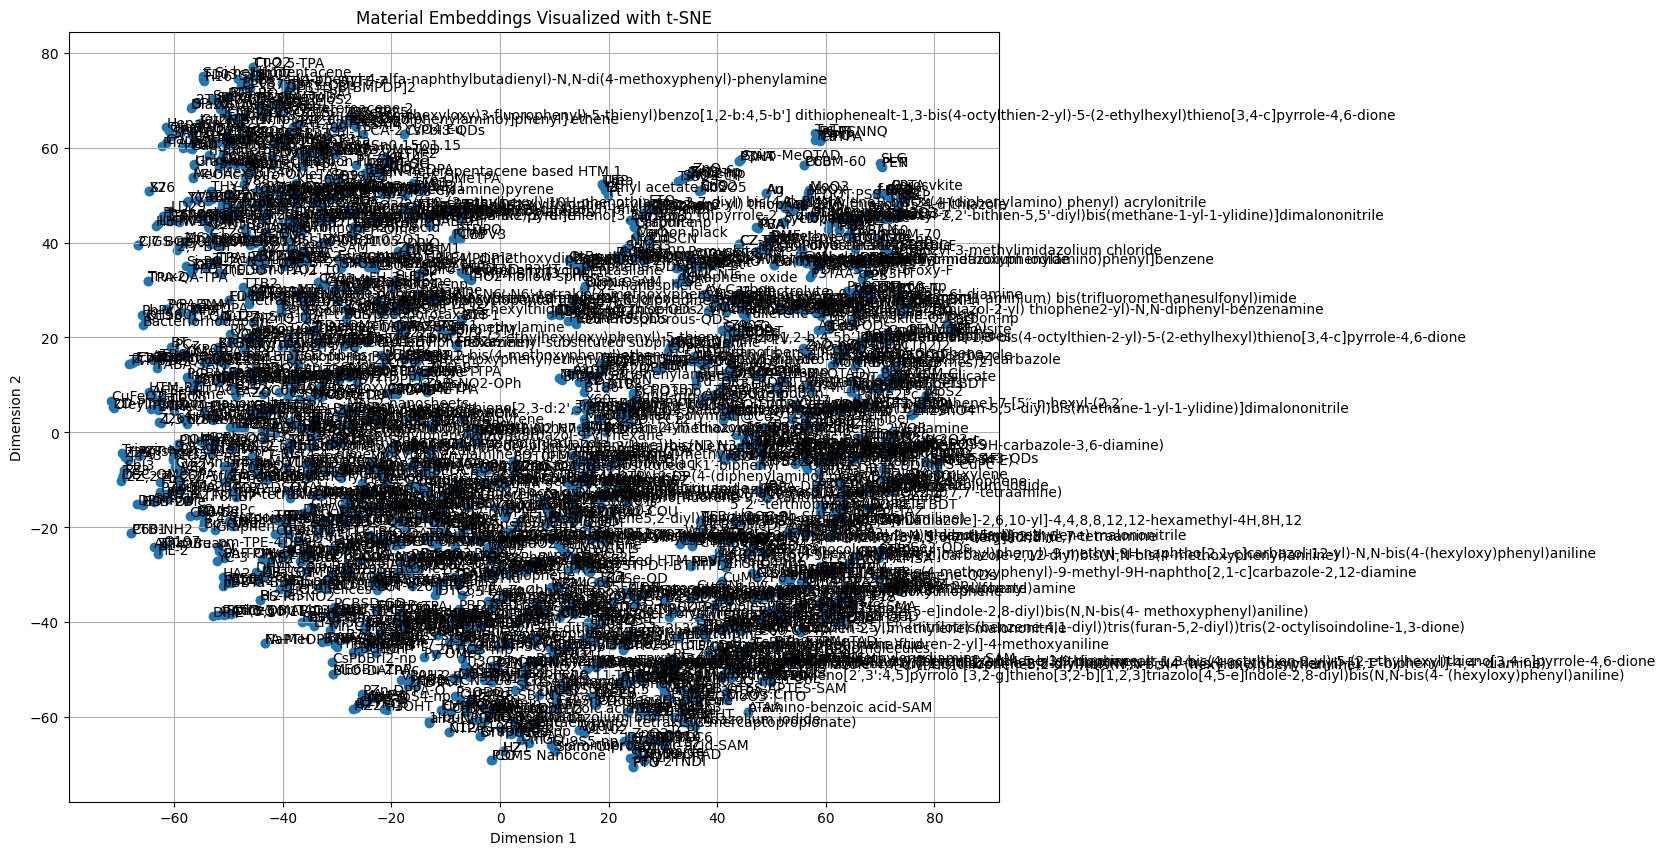

In [5]:
# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
reduced_embeddings_tsne = tsne.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(12, 10))
plt.scatter(reduced_embeddings_tsne[:, 0], reduced_embeddings_tsne[:, 1])

# Annotate materials
for i, material in enumerate(materials):
    plt.annotate(material, xy=(reduced_embeddings_tsne[i, 0], reduced_embeddings_tsne[i, 1]))

plt.title('Material Embeddings Visualized with t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()


In [ ]:
# Save the model
model.save('cell_stack_sequence_word2vec.model')

# Or save the embeddings in a keyed vectors format
model.wv.save('cell_stack_sequence_embeddings.kv')


/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_77714/626915439.py:10: DtypeWarning: Columns (10,22,29,31,32,35,36,40,44,45,46,48,51,54,65,84,89,90,93,98,99,100,105,108,115,118,122,123,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,194,225,271,272,273,277,304,315,321,325,330,331,335,336,342,348,369,371,373,374,376,380,384,387,403,405,407,409) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Number of unique materials: 1931


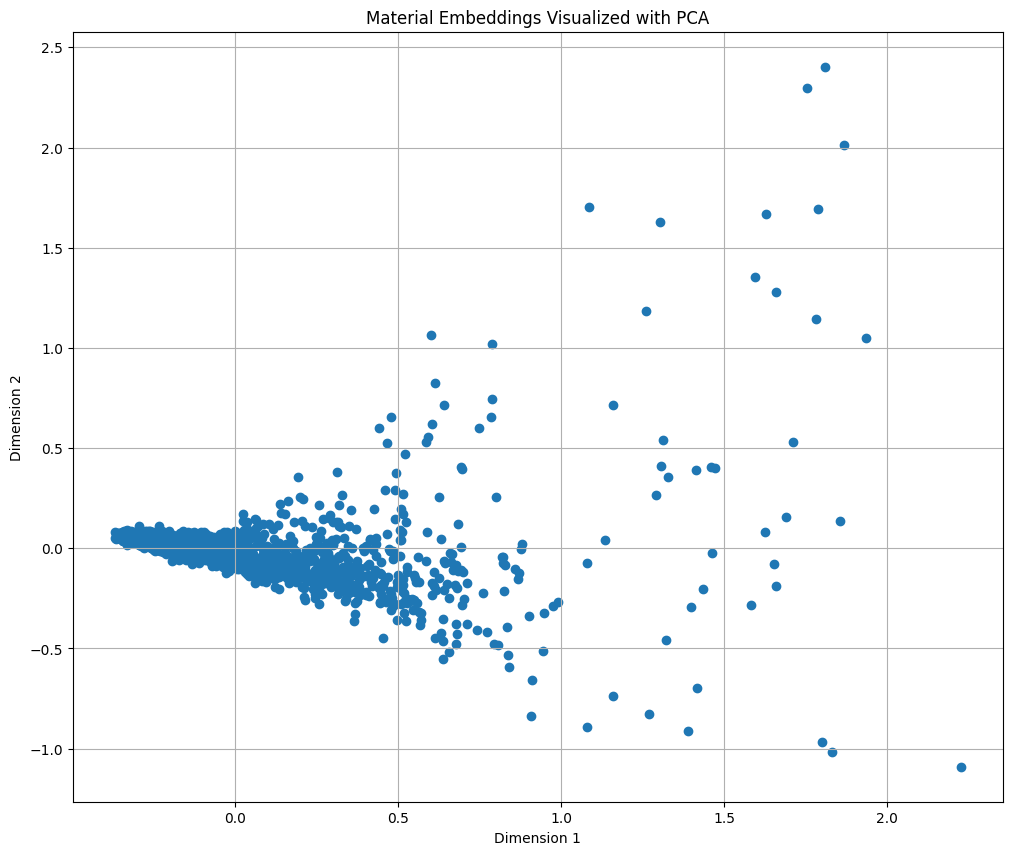

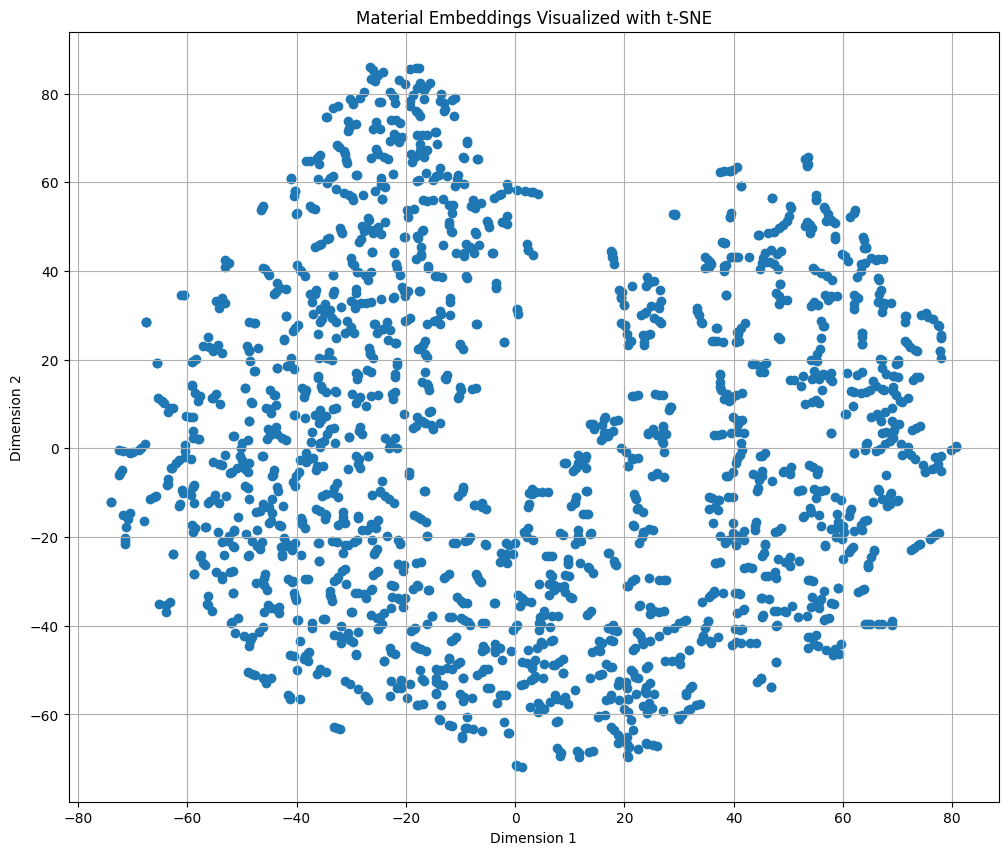

In [7]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load the dataset
file_path = 'perovskite_database_query.csv'
data = pd.read_csv(file_path)

# Filter rows where 'Cell_architecture' is exactly 'nip' (if needed)
data = data[data['Cell_architecture'].str.strip().str.lower() == 'nip']

# Extract the 'Cell_stack_sequence' column
cell_stack_sequences = data['Cell_stack_sequence'].dropna().reset_index(drop=True)

# Function to preprocess and tokenize sequences
def tokenize_sequences(sequence_series):
    sequences = []
    for seq in sequence_series:
        # Split the sequence into layers
        layers = seq.split(' | ')
        tokenized_layers = []
        for layer in layers:
            # Split layers into materials
            materials = layer.split('; ')
            tokenized_layers.extend(materials)
        sequences.append(tokenized_layers)
    return sequences

# Tokenize the cell stack sequences
tokenized_sequences = tokenize_sequences(cell_stack_sequences)

# Train the Word2Vec model
model = Word2Vec(
    sentences=tokenized_sequences,
    vector_size=50,  # Embedding size
    window=5,        # Context window size
    min_count=1,     # Minimum frequency count of words
    workers=4,       # Number of worker threads
    sg=1             # Skip-gram model
)

# Get the list of unique materials (vocabulary)
materials = list(model.wv.index_to_key)
print("Number of unique materials:", len(materials))

# Extract embeddings
embeddings = np.array([model.wv[material] for material in materials])

# Function to plot embeddings with optional annotations
def plot_embeddings(embeddings_2d, materials, title, annotate=True):
    plt.figure(figsize=(12, 10))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

    if annotate:
        # Annotate materials
        for i, material in enumerate(materials):
            plt.annotate(material, xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]))

    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.grid(True)
    plt.show()

# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_embeddings_pca = pca.fit_transform(embeddings)

# Plot the embeddings using PCA with annotation option
plot_embeddings(
    embeddings_2d=reduced_embeddings_pca,
    materials=materials,
    title='Material Embeddings Visualized with PCA',
    annotate=False  # Set to False to turn off annotations
)

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
reduced_embeddings_tsne = tsne.fit_transform(embeddings)

# Plot the embeddings using t-SNE with annotation option
plot_embeddings(
    embeddings_2d=reduced_embeddings_tsne,
    materials=materials,
    title='Material Embeddings Visualized with t-SNE',
    annotate=False  # Set to False to turn off annotations
)


/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_80107/55863500.py:11: DtypeWarning: Columns (10,22,29,31,32,35,36,40,44,45,46,48,51,54,65,84,89,90,93,98,99,100,105,108,115,118,122,123,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,194,225,271,272,273,277,304,315,321,325,330,331,335,336,342,348,369,371,373,374,376,380,384,387,403,405,407,409) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Number of unique materials: 1931


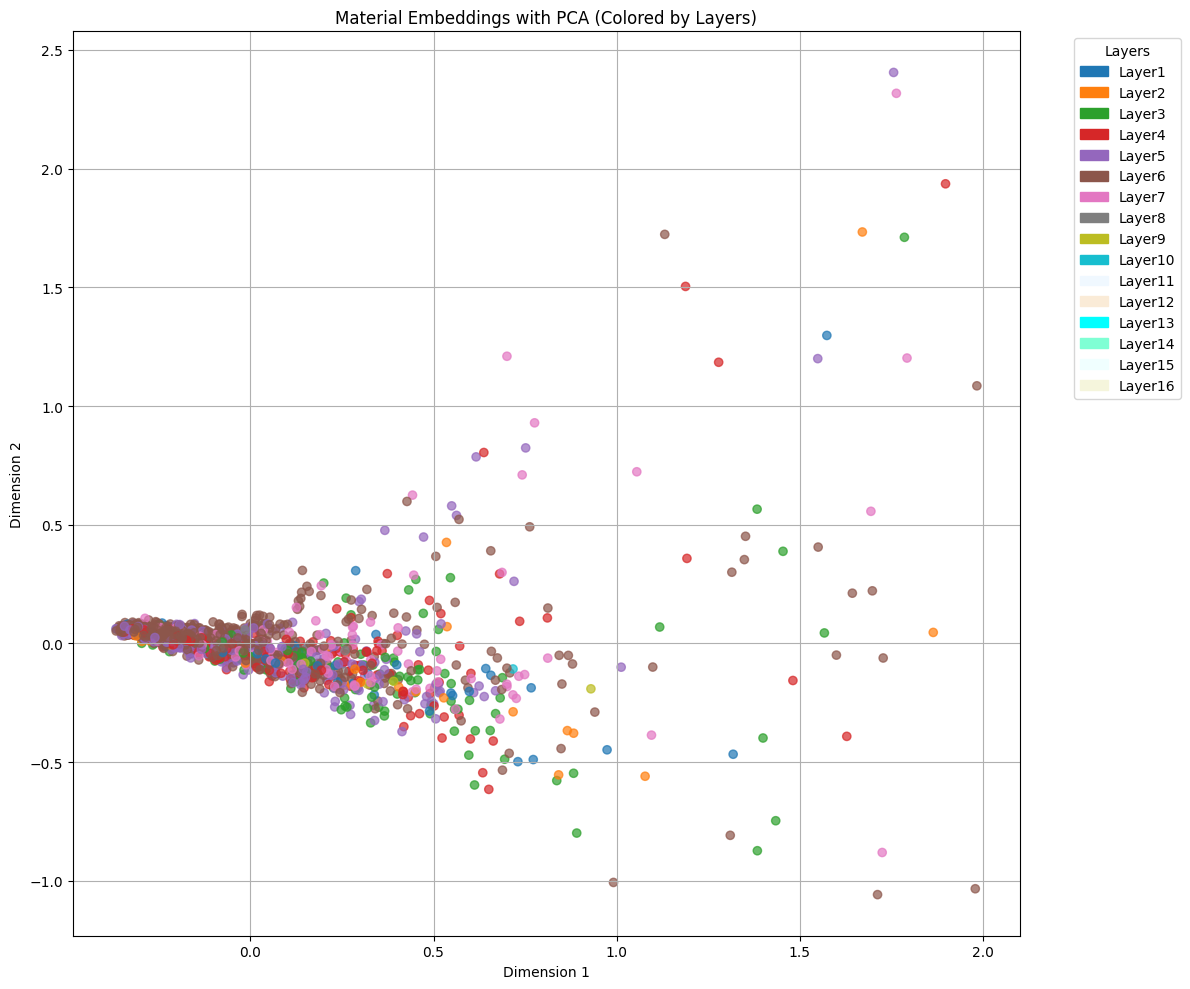

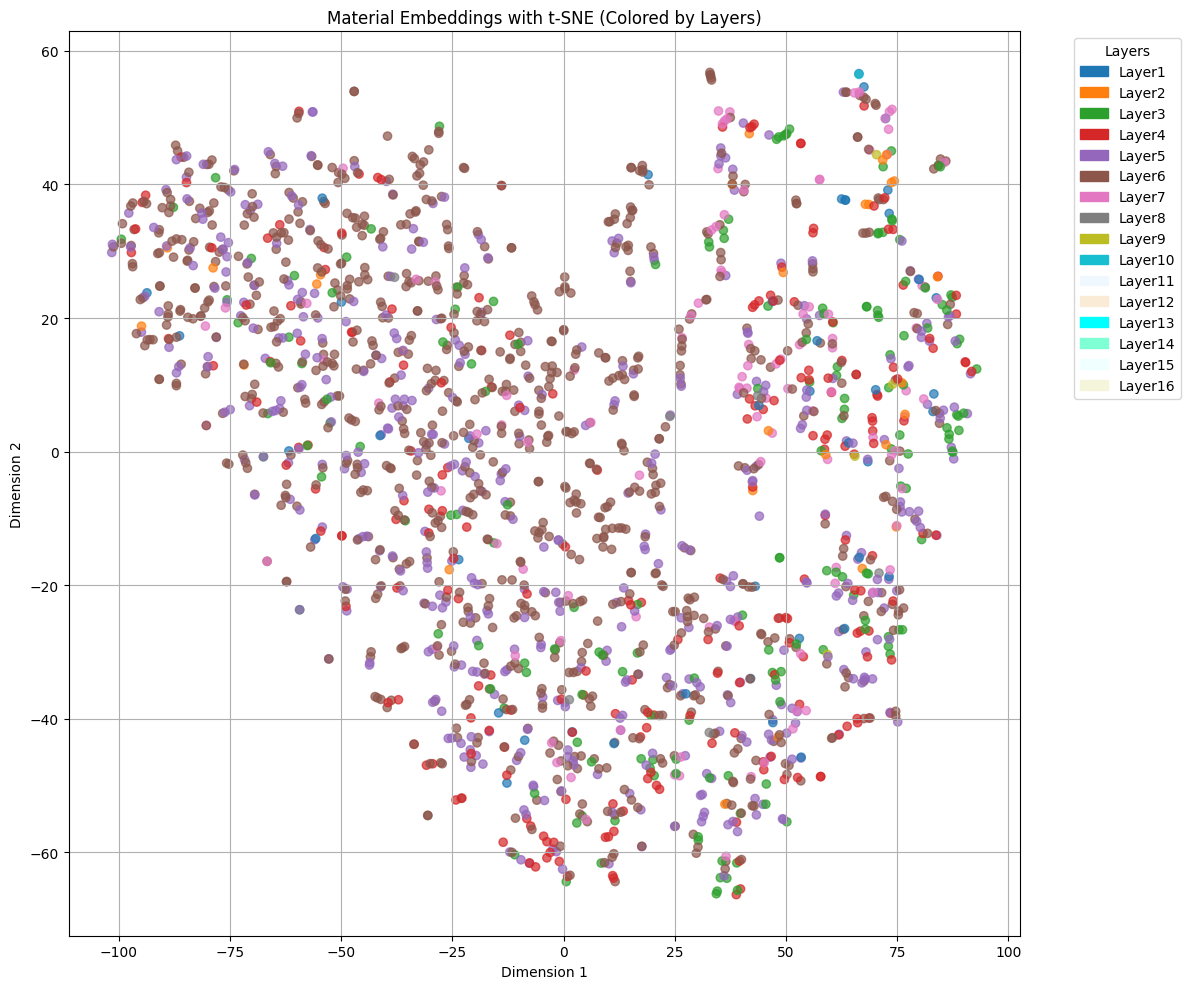

In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.colors as mcolors

# Load the dataset
file_path = 'perovskite_database_query.csv'
data = pd.read_csv(file_path)

# Filter rows where 'Cell_architecture' is exactly 'nip' (if needed)
data = data[data['Cell_architecture'].str.strip().str.lower() == 'nip']

# Extract the 'Cell_stack_sequence' column
cell_stack_sequences = data['Cell_stack_sequence'].dropna().reset_index(drop=True)

# Function to preprocess and tokenize sequences and map materials to layers
def parse_sequences(sequence_series):
    sequences = []
    material_layer_map = {}  # Material to layers mapping with counts
    layer_names = []  # Keep track of unique layer names

    for seq in sequence_series:
        # Split the sequence into layers
        layers = seq.split(' | ')
        tokenized_layers = []
        for idx, layer in enumerate(layers):
            # For this example, we'll name layers as Layer1, Layer2, etc.
            layer_name = f'Layer{idx+1}'
            if layer_name not in layer_names:
                layer_names.append(layer_name)
            # Split layers into materials
            materials = layer.split('; ')
            tokenized_layers.extend(materials)
            for material in materials:
                if material not in material_layer_map:
                    material_layer_map[material] = {}
                if layer_name not in material_layer_map[material]:
                    material_layer_map[material][layer_name] = 0
                material_layer_map[material][layer_name] += 1
        sequences.append(tokenized_layers)
    return sequences, material_layer_map, layer_names

# Parse the cell stack sequences and get material to layer mapping
tokenized_sequences, material_layer_map, layer_names = parse_sequences(cell_stack_sequences)

# Train the Word2Vec model
model = Word2Vec(
    sentences=tokenized_sequences,
    vector_size=50,  # Embedding size
    window=5,        # Context window size
    min_count=1,     # Minimum frequency count of words
    workers=4,       # Number of worker threads
    sg=1             # Skip-gram model
)

# Get the list of unique materials (vocabulary)
materials = list(model.wv.index_to_key)
print("Number of unique materials:", len(materials))

# Assign a primary layer to each material based on frequency
material_primary_layer = {}
for material, layers in material_layer_map.items():
    # Assign the material to the layer where it occurs most frequently
    primary_layer = max(layers, key=layers.get)
    material_primary_layer[material] = primary_layer

# Assign colors to layers
# Get a list of distinct colors
colors = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
layer_colors = {}
for idx, layer_name in enumerate(layer_names):
    layer_colors[layer_name] = colors[idx % len(colors)]

# Extract embeddings
embeddings = np.array([model.wv[material] for material in materials])

# Function to plot embeddings with color coding based on layers
def plot_embeddings_colored(embeddings_2d, materials, material_layer_map, title, annotate=True):
    plt.figure(figsize=(12, 10))
    # Prepare data for plotting
    x = embeddings_2d[:, 0]
    y = embeddings_2d[:, 1]
    # Get colors for materials
    colors_list = [layer_colors[material_primary_layer[material]] for material in materials]
    # Plot embeddings
    scatter = plt.scatter(x, y, c=colors_list, alpha=0.7)

    if annotate:
        # Annotate materials
        for i, material in enumerate(materials):
            plt.annotate(material, xy=(x[i], y[i]))
    
    # Create legend handles
    import matplotlib.patches as mpatches
    legend_handles = []
    for layer_name, color in layer_colors.items():
        patch = mpatches.Patch(color=color, label=layer_name)
        legend_handles.append(patch)
    plt.legend(handles=legend_handles, title='Layers', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_embeddings_pca = pca.fit_transform(embeddings)

# Plot the embeddings using PCA with color coding
plot_embeddings_colored(
    embeddings_2d=reduced_embeddings_pca,
    materials=materials,
    material_layer_map=material_primary_layer,
    title='Material Embeddings with PCA (Colored by Layers)',
    annotate=False  # Set to True to display annotations
)

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
reduced_embeddings_tsne = tsne.fit_transform(embeddings)

# Plot the embeddings using t-SNE with color coding
plot_embeddings_colored(
    embeddings_2d=reduced_embeddings_tsne,
    materials=materials,
    material_layer_map=material_primary_layer,
    title='Material Embeddings with t-SNE (Colored by Layers)',
    annotate=False  # Set to True to display annotations
)


/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_80107/1000567113.py:11: DtypeWarning: Columns (10,22,29,31,32,35,36,40,44,45,46,48,51,54,65,84,89,90,93,98,99,100,105,108,115,118,122,123,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,194,225,271,272,273,277,304,315,321,325,330,331,335,336,342,348,369,371,373,374,376,380,384,387,403,405,407,409) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Number of unique materials: 2149


/var/folders/j3/pj3kpjws5gj32d8zrny204340000gn/T/ipykernel_80107/1000567113.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', len(layer_names))


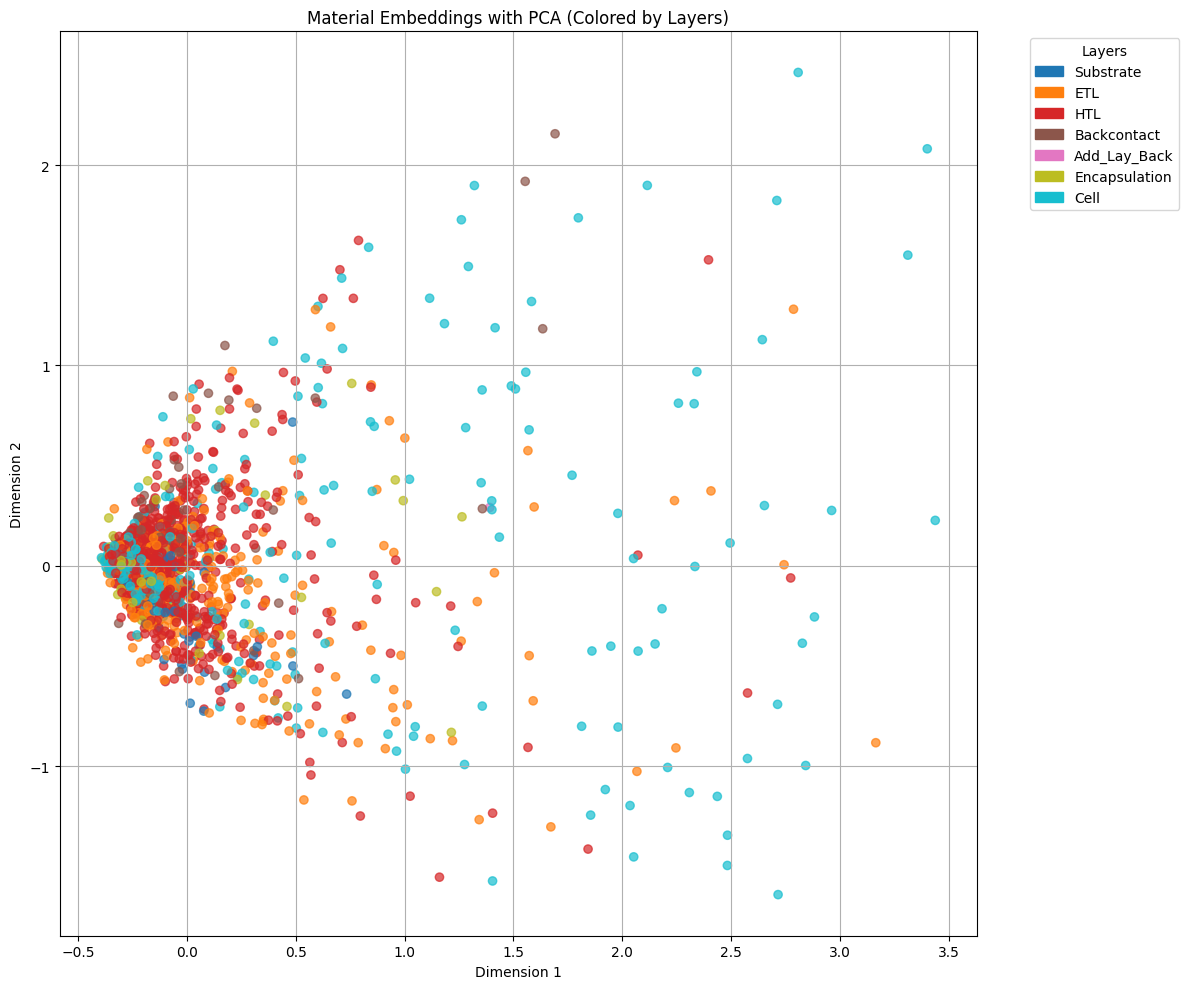

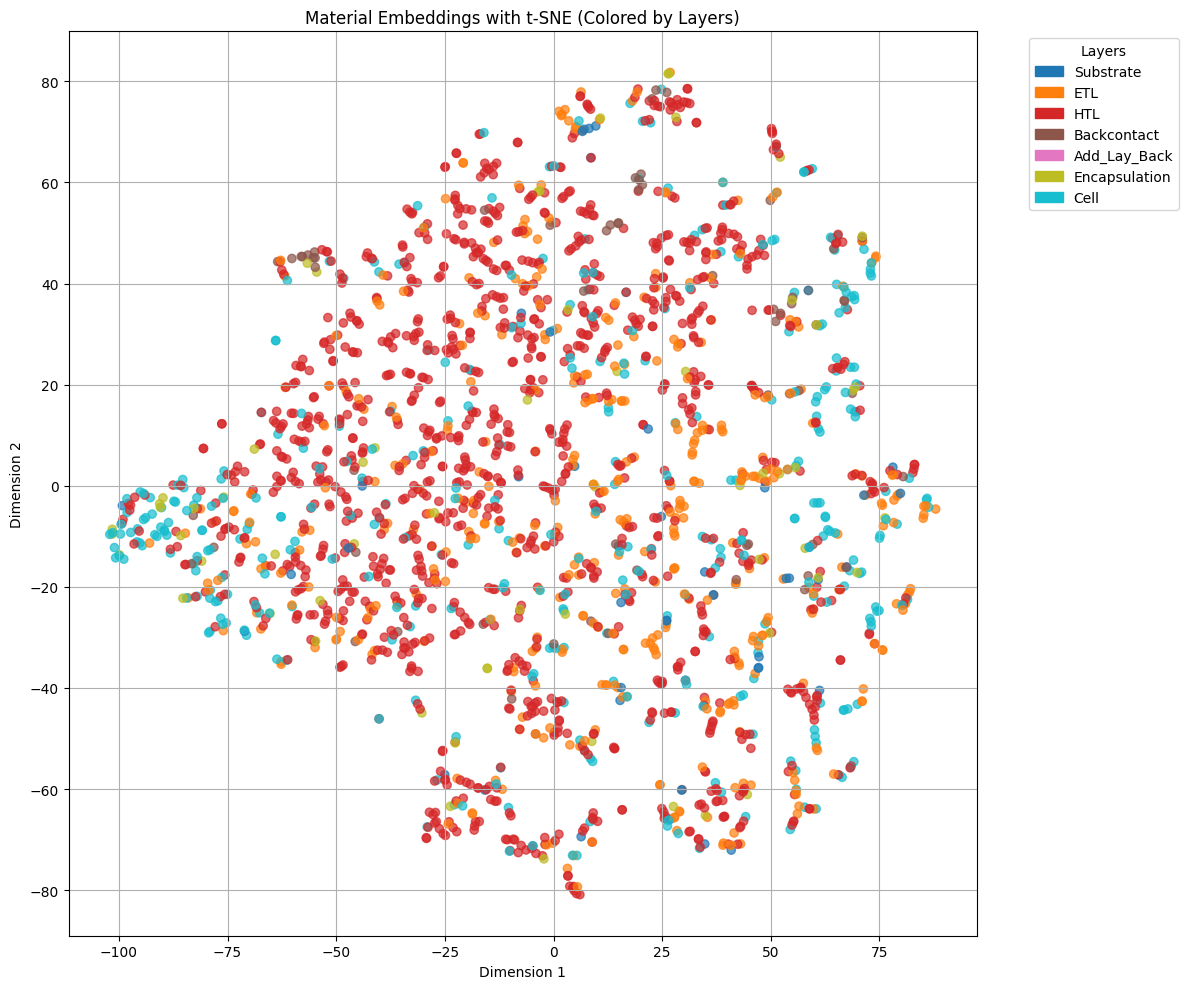

In [2]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.colors as mcolors

# Load the dataset
file_path = 'perovskite_database_query.csv'
data = pd.read_csv(file_path)

# Filter rows where 'Cell_architecture' is exactly 'nip' (if needed)
data = data[data['Cell_architecture'].str.strip().str.lower() == 'nip']

# List of specific layer columns and their corresponding layer names
layer_columns = {
    'Substrate_stack_sequence': 'Substrate',
    'ETL_stack_sequence': 'ETL',
    'HTL_stack_sequence': 'HTL',
    'Backcontact_stack_sequence': 'Backcontact',
    'Add_lay_back_stack_sequence': 'Add_Lay_Back',
    'Encapsulation_stack_sequence': 'Encapsulation',
    'Cell_stack_sequence': 'Cell'
}

# Extract the relevant columns and drop rows with NaN in all columns
data = data.dropna(subset=list(layer_columns.keys()), how='all').reset_index(drop=True)

# Function to parse sequences from multiple columns
def parse_sequences_from_columns(dataframe, layer_columns):
    sequences = []
    material_layer_map = {}  # Material to layers mapping with counts
    layer_names = list(layer_columns.values())
    
    for idx, row in dataframe.iterrows():
        sequence = []
        for col, layer_name in layer_columns.items():
            seq_str = row[col]
            if pd.isna(seq_str):
                continue
            # Split the sequence into layers (if applicable)
            layers = seq_str.split(' | ')
            for layer in layers:
                # Split layers into materials
                materials = layer.split('; ')
                sequence.extend(materials)
                for material in materials:
                    if material not in material_layer_map:
                        material_layer_map[material] = {}
                    if layer_name not in material_layer_map[material]:
                        material_layer_map[material][layer_name] = 0
                    material_layer_map[material][layer_name] += 1
        sequences.append(sequence)
    return sequences, material_layer_map, layer_names

# Parse the sequences from specified columns
tokenized_sequences, material_layer_map, layer_names = parse_sequences_from_columns(data, layer_columns)
# Train the Word2Vec model on all materials from all layers
model = Word2Vec(
    sentences=tokenized_sequences,
    vector_size=50,  # Embedding size
    window=5,        # Context window size
    min_count=1,     # Minimum frequency count of words
    workers=4,       # Number of worker threads
    sg=1             # Skip-gram model
)

# Get the list of unique materials (vocabulary)
materials = list(model.wv.index_to_key)
print("Number of unique materials:", len(materials))

# Assign a primary layer to each material based on frequency
material_primary_layer = {}
for material, layers in material_layer_map.items():
    # Assign the material to the layer where it occurs most frequently
    primary_layer = max(layers, key=layers.get)
    material_primary_layer[material] = primary_layer

# Assign colors to layers
# Use a colormap that supports a larger number of distinct colors
import matplotlib.cm as cm

# Get a colormap with enough distinct colors
cmap = cm.get_cmap('tab10', len(layer_names))

layer_colors = {}
for idx, layer_name in enumerate(layer_names):
    layer_colors[layer_name] = cmap(idx)

# Extract embeddings
embeddings = np.array([model.wv[material] for material in materials])

# Function to plot embeddings with color coding based on layers
def plot_embeddings_colored(embeddings_2d, materials, material_layer_map, title, annotate=True):
    plt.figure(figsize=(12, 10))
    # Prepare data for plotting
    x = embeddings_2d[:, 0]
    y = embeddings_2d[:, 1]
    # Get colors for materials
    colors_list = [layer_colors[material_primary_layer[material]] for material in materials]
    # Plot embeddings
    scatter = plt.scatter(x, y, c=colors_list, alpha=0.7)
    
    if annotate:
        # Annotate materials
        for i, material in enumerate(materials):
            plt.annotate(material, xy=(x[i], y[i]))
    
    # Create legend handles
    import matplotlib.patches as mpatches
    legend_handles = []
    for layer_name, color in layer_colors.items():
        patch = mpatches.Patch(color=color, label=layer_name)
        legend_handles.append(patch)
    plt.legend(handles=legend_handles, title='Layers', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_embeddings_pca = pca.fit_transform(embeddings)

# Plot the embeddings using PCA with color coding
plot_embeddings_colored(
    embeddings_2d=reduced_embeddings_pca,
    materials=materials,
    material_layer_map=material_primary_layer,
    title='Material Embeddings with PCA (Colored by Layers)',
    annotate=False  # Set to True to display annotations
)

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
reduced_embeddings_tsne = tsne.fit_transform(embeddings)

# Plot the embeddings using t-SNE with color coding
plot_embeddings_colored(
    embeddings_2d=reduced_embeddings_tsne,
    materials=materials,
    material_layer_map=material_primary_layer,
    title='Material Embeddings with t-SNE (Colored by Layers)',
    annotate=False  # Set to True to display annotations
)


